# Dataproject of the employmentrate in the danish municipalities

In this dataproject we will describe and analyse the employment rate of danish municipalities in the period 2008-2018. We will, among other things, analyse the correlation between the employment rate and disposable income in the municipalities together with the correlation between the employment rate and the accidents ratio.
Thus the goal of the project is to come up with different possible explanations to why the employment rate in the danish municipalities is different. We are aware that we cannot, based on the analysis, say anything about the causality - to do that we need to perform regressions.

We start by importing the needed packages; for then to turn to the cleaning proces of the datasets of the variables. The variables we are going to describe and analyze are: The municipality size (population), employmentrate, accidents ratio, immigrant from non-western countries ratio, sentences ratio and disposable income. Each variable is devided into the danish municipalities. 

As we cannot analyze every 98 municipalities in Denmark we are going to examine different representative municipalities. We choose these municipalities such that they are representative for the danish municipalities - thereby we choose to examine the municipality with the highest observed, lowest observed, median observed, the 25 percentile and the 75 percentile employmentrate. 
When choosing these representative municipalities there is still a chance that they are bias of the population size - as an example it is imagineable, that there is a small outlier municipality with the absolutely highest or absolutely lowest employment rate. To make up for this we will finally present a representative selection of the 10 largest municipalities.

Finally we will analyse the correlation mentioned above graphically.


# **Importing needed packages**

***Note***: Before procedeeing, make sure you have acces to the data used in this project; you will need to instal: pip install git+https://github.com/elben10/pydst in ypur Anaconda Prompt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
import dataproject
import pydst as pydst
dst = pydst.Dst(lang='en') #Setting the language to english
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import seaborn as sb
from pylab import *

# **Cleaning process**

This first section collects datasets from DST and cleans them in order to get the wanted variable
collections of datasets and cleaning. To get an overview of which variables are contained in each dataset we start by running the following lines separately. Every dataset is divided into the danish municipalities.



In [2]:
#Running this line gives an overview of the datasets in: Statistics Denmark
dst.get_subjects()

#The dataset of the population size
dst.get_tables(subjects=['02']).head(10)
dst.get_variables(table_id = 'FOLK1A')

#The dataset of the employment rate
dst.get_tables(subjects=['14']).head(10)
dst.get_variables(table_id = 'RAS200')

#The dataset of the number of accidents
dst.get_tables(subjects=['14']).head(10)
dst.get_variables(table_id = 'UHELDK7')

#The dataset of immigrants
dst.get_tables(subjects=['14']).head(10)
dst.get_variables(table_id = 'FOLK1E')

#The dataset of the number of sentences
dst.get_tables(subjects=['14']).head(10)
dst.get_variables(table_id = 'STRAF41')

#The datset of the disposable income
dst.get_tables(subjects=['14']).head(10)
dst.get_variables(table_id='INDKP107')


,id,text,elimination,time,map,values
0,OMRÅDE,region,True,False,denmark_municipality_07,"[{'id': '000', 'text': 'All Denmark'}, {'id': ..."
1,ENHED,unit,False,False,NaN,"[{'id': '101', 'text': 'People with type of in..."
2,KOEN,sex,True,False,NaN,"[{'id': 'MOK', 'text': 'Men and women, total'}..."
3,UDDNIV,level of education,False,False,NaN,"[{'id': '10', 'text': '10 BASIC SCHOOL 8-10 gr..."
4,INDKOMSTTYPE,type of income,False,False,NaN,"[{'id': '100', 'text': '1 Disposable income (2..."
5,Tid,time,False,True,NaN,"[{'id': '2004', 'text': '2004'}, {'id': '2005'..."


In the document [dataproject.py] we have constructed different functions in order to clean the datasets. These are more thouroghly explained in the docstring of each one. We run the different functions for each dataset from DST and delete the unnecessary columns. 

In [3]:
#Downloading and defining the dataset for the population of the danish municipalities
variables = {'OMRÅDE':['*'],'Tid':['*']} 
pop = dst.get_data(table_id = 'FOLK1A', variables=variables)

#Using the functions made in [dataproject.py] to clean and sort the dataset
pop = dataproject.initial_rename(pop,'population')
pop = dataproject.only_keep_municipalities_and_years(pop,0,2008,2018)
pop = dataproject.sort_reset(pop)

# Deleting unnecessary colunms, which we are not going to use
del pop['KØN']; del pop['ALDER']; del pop['CIVILSTAND']
pop


,municipality,year,population
0,Aabenraa,2008,60189
1,Aabenraa,2009,60392
2,Aabenraa,2010,59978
3,Aabenraa,2011,59795
4,Aabenraa,2012,59600
...,...,...,...
1062,Ærø,2014,6393
1063,Ærø,2015,6276
1064,Ærø,2016,6290
1065,Ærø,2017,6177


In [4]:
#Downloading the employment rate data of the danish municipalities
variables={'OMRÅDE':['*'], 'BEREGNING':['*'], 'TID':['*']} 
empl = dst.get_data(table_id = 'RAS200', variables=variables)

empl = dataproject.initial_rename(empl,'employment rate')
empl = dataproject.only_keep_municipalities_and_years(empl,0,2008,2018)

#As we will only examine the employment rate we make use of the following code to keep only the employment rate 
I = empl.BEREGNING.str.contains('Employment rate')
empl = empl.loc[I == True] # Deleting everything else than the : "Employment rate"

#Sorting the table:
empl= dataproject.sort_reset(empl)

del empl['KØN']; del empl['ALDER']; del empl['HERKOMST']; del empl['BEREGNING']

empl

,municipality,year,employment rate
0,Aabenraa,2008,74.6
1,Aabenraa,2009,71.6
2,Aabenraa,2010,70.9
3,Aabenraa,2011,70.2
4,Aabenraa,2012,69.5
...,...,...,...
1062,Ærø,2014,65.1
1063,Ærø,2015,65.8
1064,Ærø,2016,67.0
1065,Ærø,2017,68.1


In [5]:
#Downloading accident data of the danish municipalities
variables={'OMRÅDE':['*'], 'UHELDA':['*'], 'TID':['*']}
accidents = dst.get_data(table_id = 'UHELDK7', variables=variables)

accidents = dataproject.initial_rename(accidents,'Number of accidents')
accidents = dataproject.only_keep_municipalities_and_years(accidents,0,2008,2018)

#The 2 lines below ensures, that we only are going to examine "All accidents" and not the subcategories.
I = accidents.UHELDA.str.contains('All accidents')
accidents = accidents.loc[I == True]

accidents= dataproject.sort_reset(accidents)

del accidents['UHELDA']; del accidents['BYLAND']; del accidents['UHELDSIT']

accidents

,municipality,year,Number of accidents
0,Aabenraa,2008,4
1,Aabenraa,2009,4
2,Aabenraa,2010,1
3,Aabenraa,2011,4
4,Aabenraa,2012,4
...,...,...,...
782,Ærø,2009,2
783,Ærø,2011,2
784,Ærø,2015,2
785,Ærø,2016,2


In [6]:
#Downloading data on immigrants from non-western countries in the danish municipalities
variables={'OMRÅDE':['*'],'HERKOMST':{'*'}, 'TID':['*']}
immigrants = dst.get_data(table_id = 'FOLK1E', variables=variables)

immigrants = dataproject.initial_rename(immigrants,'Immigrants')
immigrants = dataproject.only_keep_municipalities_and_years(immigrants,0,2008,2018)

#The 2 lines below ensures, that we only are going to examine "immigrants from non-western countries"
I = immigrants.HERKOMST.str.contains('Immigrants from non-western countries')
immigrants = immigrants.loc[I == True]

del immigrants['KØN']; del immigrants['ALDER']; del immigrants['HERKOMST']

immigrants = dataproject.sort_reset(immigrants)

immigrants


,municipality,year,Immigrants
0,Aabenraa,2008,1787
1,Aabenraa,2009,1822
2,Aabenraa,2010,1817
3,Aabenraa,2011,1887
4,Aabenraa,2012,1906
...,...,...,...
1062,Ærø,2014,104
1063,Ærø,2015,103
1064,Ærø,2016,123
1065,Ærø,2017,145


In [7]:
#Dowloading data on sentences of the danish municipalities
variables={'OMRÅDE':['*'], 'TID':['*']}
sentences = dst.get_data(table_id = 'STRAF41', variables=variables)

sentences = dataproject.initial_rename(sentences,'Number of sentences')
sentences = dataproject.only_keep_municipalities_and_years(sentences,0,2008,2018)
sentences = dataproject.sort_reset(sentences)

del sentences['KØN']; del sentences['ALDER']

sentences

,municipality,year,Number of sentences
0,Aabenraa,2008,49197
1,Aabenraa,2009,49132
2,Aabenraa,2010,49145
3,Aabenraa,2011,49146
4,Aabenraa,2012,48994
...,...,...,...
1062,Ærø,2014,5612
1063,Ærø,2015,5561
1064,Ærø,2016,5553
1065,Ærø,2017,5489


In [8]:
#Dowloading data on average disposable income of the danish municipalities
variables={'OMRÅDE':['*'], 'TID':['*'], 'ENHED':['*']} 
avginc = dst.get_data(table_id = 'INDKP107', variables=variables)

avginc = dataproject.initial_rename(avginc,'Avg disp income')
avginc = dataproject.only_keep_municipalities_and_years(avginc,0,2008,2018)

#The 2 lines below ensures, that we only are going to examine "Average income for all people"
I = avginc.ENHED.str.contains('all people')
avginc = avginc.loc[I == True]

avginc = dataproject.sort_reset(avginc)

del avginc['ENHED']; del avginc['KOEN']; del avginc['UDDNIV']; del avginc['INDKOMSTTYPE']

avginc

,municipality,year,Avg disp income
0,Aabenraa,2008,125064
1,Aabenraa,2009,123277
2,Aabenraa,2010,130019
3,Aabenraa,2011,132330
4,Aabenraa,2012,133960
...,...,...,...
1062,Ærø,2014,132795
1063,Ærø,2015,129903
1064,Ærø,2016,136753
1065,Ærø,2017,142416


As we have now collected all the necessary datasets we will merge them all together into one single DataFrame. The single Dataframe gives a nice overview of the considered variables and establish the foundation of a quick correlation analysis. This is done below:

In [9]:
#Merge of all the downloaded datasets to one

Table1 = pop
Table1 = Table1.join([empl['employment rate'],immigrants['Immigrants'],sentences['Number of sentences'],avginc['Avg disp income']]) #['x'] tells which columns shall be merged onto the new main table.

#The merging of accidents is done seperatly since it is missing a few observations (namely the ones with 0 accidents)
Table1 = Table1.merge(accidents, left_on=['municipality','year'], right_on=['municipality','year'], how='left')
Table1 = Table1.fillna(0) # inserts the 0 at NaN 
Table1['Number of accidents'] = Table1['Number of accidents'].astype(int)

Table1



,municipality,year,population,employment rate,Immigrants,Number of sentences,Avg disp income,Number of accidents
0,Aabenraa,2008,60189,74.6,1787,49197,125064,4
1,Aabenraa,2009,60392,71.6,1822,49132,123277,4
2,Aabenraa,2010,59978,70.9,1817,49145,130019,1
3,Aabenraa,2011,59795,70.2,1887,49146,132330,4
4,Aabenraa,2012,59600,69.5,1906,48994,133960,4
...,...,...,...,...,...,...,...,...
1062,Ærø,2014,6393,65.1,104,5612,132795,0
1063,Ærø,2015,6276,65.8,103,5561,129903,2
1064,Ærø,2016,6290,67.0,123,5553,136753,2
1065,Ærø,2017,6177,68.1,145,5489,142416,1


# **Analysis and Merging**


As the above table does not say anything of the relative coherence, we will convert the absolut numbers in the different categories to ratios, such that it is possible to compare them to the employment rate. We therefore make use of the code below to do this. We calculate the ratio as follows:

$$
X_{Ratio} = \frac{X_{i,j}}{pop_{i,j}} *100
$$
where *X* is the variable, such as: "Immigrants" and *pop* is the population size. *i* referes to "*year i*" and *j* refers to "*municipality j*"

In [10]:
# We append Table1 with different ratios
Table1['Immigrants ratio'] = Table1['Immigrants'] / Table1['population'] * 100
Table1['Accident ratio'] = Table1['Number of accidents'] / Table1['population'] * 100
Table1['Sentences ratio'] = Table1['Number of sentences'] / Table1['population'] * 100

#  Then we round the Ratios to two decimals
Table1['Immigrants ratio'] = Table1['Immigrants ratio'].round(2)
Table1['Accident ratio'] = Table1['Accident ratio'].round(2)
Table1['Sentences ratio'] = Table1['Sentences ratio'].round(2)

Table1


,municipality,year,population,employment rate,Immigrants,Number of sentences,Avg disp income,Number of accidents,Immigrants ratio,Accident ratio,Sentences ratio
0,Aabenraa,2008,60189,74.6,1787,49197,125064,4,2.97,0.01,81.74
1,Aabenraa,2009,60392,71.6,1822,49132,123277,4,3.02,0.01,81.36
2,Aabenraa,2010,59978,70.9,1817,49145,130019,1,3.03,0.00,81.94
3,Aabenraa,2011,59795,70.2,1887,49146,132330,4,3.16,0.01,82.19
4,Aabenraa,2012,59600,69.5,1906,48994,133960,4,3.20,0.01,82.20
...,...,...,...,...,...,...,...,...,...,...,...
1062,Ærø,2014,6393,65.1,104,5612,132795,0,1.63,0.00,87.78
1063,Ærø,2015,6276,65.8,103,5561,129903,2,1.64,0.03,88.61
1064,Ærø,2016,6290,67.0,123,5553,136753,2,1.96,0.03,88.28
1065,Ærø,2017,6177,68.1,145,5489,142416,1,2.35,0.02,88.86


In [11]:
#Defining a new table containing only the ratios and the average disposable income
Table2 = pop

Table2 = Table2.join([Table1['employment rate'],Table1['Accident ratio'],Table1['Immigrants ratio'],Table1['Sentences ratio'],Table1['Avg disp income']])

Table2

,municipality,year,population,employment rate,Accident ratio,Immigrants ratio,Sentences ratio,Avg disp income
0,Aabenraa,2008,60189,74.6,0.01,2.97,81.74,125064
1,Aabenraa,2009,60392,71.6,0.01,3.02,81.36,123277
2,Aabenraa,2010,59978,70.9,0.00,3.03,81.94,130019
3,Aabenraa,2011,59795,70.2,0.01,3.16,82.19,132330
4,Aabenraa,2012,59600,69.5,0.01,3.20,82.20,133960
...,...,...,...,...,...,...,...,...
1062,Ærø,2014,6393,65.1,0.00,1.63,87.78,132795
1063,Ærø,2015,6276,65.8,0.03,1.64,88.61,129903
1064,Ærø,2016,6290,67.0,0.03,1.96,88.28,136753
1065,Ærø,2017,6177,68.1,0.02,2.35,88.86,142416


We are now going to make the graphical analysis. To do this we need to choose different municipalities wich we are going to examine. We will choose between the municipalities based on their different employment rates, such that we have the municipality which have faced the highest employment rate, the lowest employment rate together with the 25 percentile, 75 percentile and the median. At first we start by making a box-plot to see the imidiate distribution of the employmentrates. (We are not going to distinguish between the different years, thereby not taken into account that different municipalities can be affected of the business cycles.)

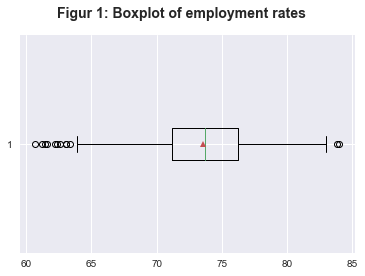

In [12]:
# Boxplot of immidiate distribution of the employment rates
fig = plt.figure()
fig.suptitle('Figur 1: Boxplot of employment rates', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(Table2['employment rate'],vert=False, showcaps=True, showmeans=True)

plt.show()

We See from the boxplot above, that the employment rate varies a lot. Furhermore we notice that there is a lot of outliers. We will now check which municipality whom had the the highest employment rate, the lowest employment rate together with the 25 percentile, 75 percentile and the median employment rate

In [13]:
 #Displaying the wanted municipalities: (BEMÆRK: TRor det er sorteret når vi bruger funktionerne)

print('The municipality with the lowest observed employment rate:')
display(Table2.loc[Table2['employment rate'] == np.min(Table2['employment rate'])])

print('The municipality with the highest observed employment rate:')
display(Table2.loc[Table2['employment rate'] == np.max(Table2['employment rate'])])

print('The municipalities with the median observed employment rate:')
display(Table2.loc[Table2['employment rate'] == np.median(Table2['employment rate'])])

print('The municipalities with the 25 percentile observed employment rate:')
display(Table2.loc[Table2['employment rate'] == np.percentile(Table2['employment rate'], 25)])

print('The municipalities with the 75 percentile observed employment rate:')
display(Table2.loc[Table2['employment rate'] == np.percentile(Table2['employment rate'], 75)])

The municipality with the lowest observed employment rate:


,municipality,year,population,employment rate,Accident ratio,Immigrants ratio,Sentences ratio,Avg disp income
598,Lolland,2012,45241,60.7,0.01,2.92,85.39,134724


The municipality with the highest observed employment rate:


,municipality,year,population,employment rate,Accident ratio,Immigrants ratio,Sentences ratio,Avg disp income
132,Egedal,2008,40533,84.0,0.0,2.74,77.85,129848


The municipalities with the median observed employment rate:


,municipality,year,population,employment rate,Accident ratio,Immigrants ratio,Sentences ratio,Avg disp income
108,Brønderslev,2017,36128,73.7,0.00,3.60,82.39,143407
164,Faaborg-Midtfyn,2018,51536,73.7,0.00,3.04,83.79,146338
221,Frederiksberg,2009,95029,73.7,0.00,6.48,85.60,131835
376,Herlev,2010,26556,73.7,0.00,7.21,82.17,134235
377,Herlev,2011,26597,73.7,0.00,7.17,81.70,138631
387,Herning,2010,85548,73.7,0.00,3.43,80.81,136394
419,Holbæk,2009,69528,73.7,0.00,3.80,80.75,125514
542,Kolding,2011,89210,73.7,0.01,4.35,81.28,134301
553,Køge,2011,57271,73.7,0.01,4.18,80.36,135493
641,Middelfart,2011,37701,73.7,0.01,2.27,81.06,134489


The municipalities with the 25 percentile observed employment rate:


,municipality,year,population,employment rate,Accident ratio,Immigrants ratio,Sentences ratio,Avg disp income
412,Hjørring,2013,65767,71.2,0.01,2.45,82.96,138429
445,Horsens,2013,84871,71.2,0.00,4.27,81.86,139705
467,Høje-Taastrup,2013,48471,71.2,0.00,11.30,81.04,142767
736,Odsherred,2018,33083,71.2,0.00,3.24,87.36,156810
740,Randers,2011,95318,71.2,0.01,3.16,82.21,131277
975,Tønder,2015,38010,71.2,0.00,2.60,84.41,141500
1028,Vesthimmerlands,2013,37586,71.2,0.01,2.23,82.73,138010


The municipalities with the 75 percentile observed employment rate:


,municipality,year,population,employment rate,Accident ratio,Immigrants ratio,Sentences ratio,Avg disp income
99,Brønderslev,2008,35525,76.2,0.01,1.99,81.08,117811
197,Faxe,2018,36139,76.2,0.00,3.40,84.49,156683
299,Greve,2010,47826,76.2,0.00,5.37,80.37,139017
301,Greve,2012,47942,76.2,0.00,5.42,81.15,143119
302,Greve,2013,47980,76.2,0.00,5.44,81.41,146541
351,Halsnæs,2018,31168,76.2,0.00,4.85,85.73,158209
494,Ikast-Brande,2018,41191,76.2,0.00,5.13,82.63,157847
713,Odder,2017,22331,76.2,0.00,3.84,83.52,143272
813,Rødovre,2018,39343,76.2,0.00,9.72,82.39,151554
934,Syddjurs,2018,42468,76.2,0.00,3.31,84.25,151441


We see from the above tables, that there are more than one municipality that have had an employmentrate at the median, 25 percentile and 75 percentile. Therefore we chooses one from each table:

* Lolland is chosen as the lowest employment rate.
* Egedal is chosen as the highest employment rate.
* To represent the median we choose Herlev as it has the 25 percentile employment rate in both year 2010 and 2011.
* To represent the 25 percentile we choose Horsens. (is randomly choosen, as every municipality only act once in the category)
* To represent the 75 percentile we choose Greve, as it has the 75 percentile employment rate in both year 2010, 2012 and 2013

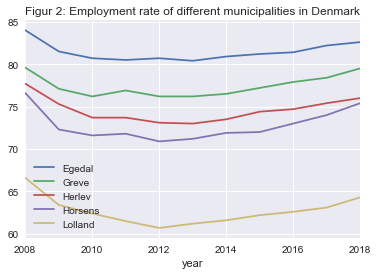

In [14]:
#Here we constructs different graphs to see the immediate relations and development of the variables

Employment_municipalities_mv = Table2[Table2['municipality'].isin(['Egedal', 'Lolland', 'Herlev', 'Horsens', 'Greve'])] 

def plot1(fig):
    fig_employ_muni = fig.set_index('year')
    fig_employ_muni.groupby(['municipality'])['employment rate'].plot(legend=True, grid=True, title='Figur 2: Employment rate of different municipalities in Denmark');

plot1(Employment_municipalities_mv) 

Applies for all we see that the employmentrates decline from 2008 to 2012, for then to rise again. "Der er relativt større afstand mellem Lollands employment rates ift. den 25 percentil relativt til forskellen mellem Egedal og den 75 percentile." hvilket kan tale for at lolland er en relativt større outlier. It seems like Lolland has relatively lower employment rates compared to how high the employment rates are for Egedal. 

In [15]:
#interaktivt plot hvor man kan vælge kommuner ud for at se på dem, i stedet for vi bare har valgt nogen random
def plot_pop(table, muni): 
    I = table['municipality'] == muni
    fig = table.set_index('year')
    fig = table.loc[I,:]
    fig = fig.groupby('municipality')['employment rate']
    fig = fig.plot(legend=True, grid=True, title='Interactive figur 3: Employment rate of random different municipalities in Denmark');

widgets.interact(plot_pop, 
    table = widgets.fixed(Table2),
    muni = widgets.Dropdown(description='Location', options=Table2.municipality.unique(), disabled = False)
);

#Se donner mv for at kunne vælge flere og sammenligne


interactive(children=(Dropdown(description='Location', options=('Aabenraa', 'Aalborg', 'Aarhus', 'Albertslund'…

(BEMÆRK: kunne være fedt med flere drop down valgmuligheder.)

The graph above can be used to examine different employment rates of own choice. As a suggestion you can compare Aabenraa, Aarhus, Skanderborg and Broendby. Of these 4 Skanderborg is the muncipality with the highest employmentrate in every year. In the other end of the spectrum we have Broendby together with Aarhus. One explanation to why Aarhus has a low employment rate is, that there lives many students in Aarhus, whom do not work, but is in the working age.

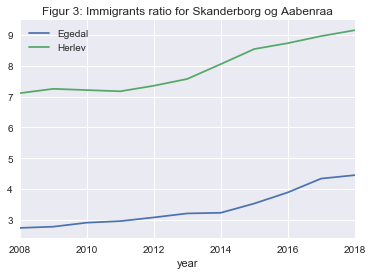

In [16]:
#Here we constructs a graph to see the immediate relations and development of the immigration ratio in Egedal and Herlev. The two municipalities is choosen as to show how the municipality with the highest observed employment rate together with the median observed employment rate to see how the immigrants ratio are here.

Immigrants_Egedal_Herlev = Table2[Table2['municipality'].isin(['Egedal', 'Herlev'])] 

def plot2(fig):
    fig_employ = fig.set_index('year')
    fig_employ.groupby(['municipality'])['Immigrants ratio'].plot(legend=True, grid=True, title='Figur 3: Immigrants ratio for Skanderborg og Aabenraa');

plot2(Immigrants_Egedal_Herlev)

Here we see that Herlev has the highest imigration ratio in every year. It could therefore (based on the 2 graphs above) be temting to conclude that the higher immigration ratio in Herlev results in a lower employmentrate in Herlev compared to Egedal. But we cannot make this conclusion, because there could be omitted variables, which also have an effect. We therefore proceed to analyze the immediate raltion of the sentences ratio and the employment rate.

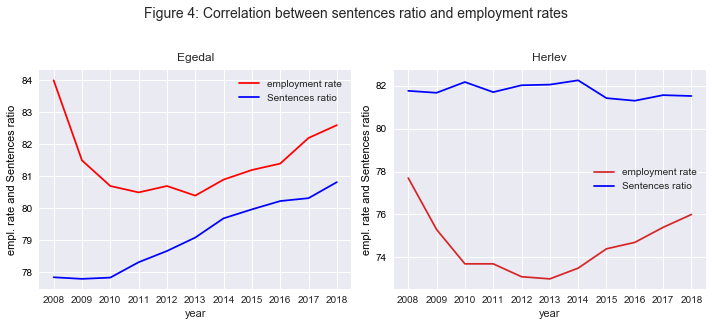

In [17]:
#Here we constructs a graph to see the immediate relations and development of the sentences ratio and employment rate
Table2_Egedal =Table2[Table2.municipality=="Egedal"] #selecting only Egedal
Table2_Herlev =Table2[Table2.municipality=="Herlev"] #selecting only Herlev

#Creating the figure:
fig = plt.figure(figsize=(10,4))
fig.suptitle('Figure 4: Correlation between sentences ratio and employment rates', size=14, y=1.12)

#Left plot showing the immidiate correlation between the employment rate and sentences ratio in Egedal
ax1_left = fig.add_subplot(1,2,1)
color = 'red'
ax1_left.set_xlabel('year')
ax1_left.set_ylabel('empl. rate and Sentences ratio', color='black')
ax1_left.plot(Table2_Egedal['year'], Table2_Egedal['employment rate'], color=color, label='employment rate')
ax1_left.plot(Table2_Egedal['year'], Table2_Egedal['Sentences ratio'], color='blue', label='Sentences ratio')
ax1_left.tick_params(axis='y', labelcolor='black')
ax1_left.legend(loc='upper right') 
ax1_left.set_title('Egedal', pad=10)
ax1_left.grid(True)

# Right plot showing the immidiate correlation between the employment rate and sentences ratio in Herlev
ax1_right = fig.add_subplot(1,2,2)
color = 'tab:red'
ax1_right.set_xlabel('year')
ax1_right.set_ylabel('empl. rate and Sentences ratio', color='black')
ax1_right.plot(Table2_Herlev['year'], Table2_Herlev['employment rate'], color=color, label='employment rate')
ax1_right.plot(Table2_Herlev['year'], Table2_Herlev['Sentences ratio'], color='blue', label='Sentences ratio')
ax1_right.legend(loc='middel right') 
ax1_right.tick_params(axis='y', labelcolor='black')
ax1_right.set_title('Herlev', pad=10)
ax1_right.grid(True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The left plot in figure 4 indicates that there could be a small correlation between the sentences ratio and employment rate in Egedal. 

Oppositely the right plot in figure 4 indicates that there is no a correlation between the sentences ratio and employment rate in Herlev. As Herlev is choosen because it is the median, we take it as a good indicator for danish municipalities. The Sentences ratio sems quite constant for every year. 

So based on the 2 figures above it is difficult to say something general about the correlation between the employment rate and the sentences ratio.

Therefore we check one more municipality (The 75 percentile - Greve) to check if it is a general result.

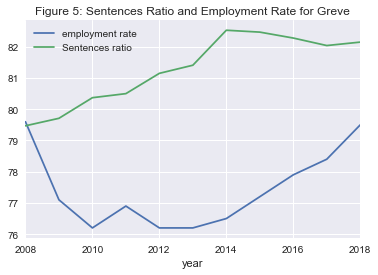

In [18]:
#Here we constructs the same graph as above, but now examine Greve. 
Emp_acci_sent = Table2[Table2['municipality'].isin(['Greve'])] 

def plot4(fig):
    fig_employ = fig.set_index('year')
    fig_employ.groupby(['municipality'])['employment rate', 'Sentences ratio'].plot(legend=True, grid=True, title='Figure 5: Sentences Ratio and Employment Rate for Greve');

plot4(Emp_acci_sent)

The sentences ratio in Greve does not seem to follow the same trend as for Herlev. But the sentences ratio is increasing up to almost the same sentences ratio as for Herlev. This could indicate that the ratio is going to be the same in the near future. The sentences ratio do seem to follow more the same trend as for Egedal. It is steadly rising up to 2014, but then it stagnate as to follow a more constant trend for the rest of the years. 

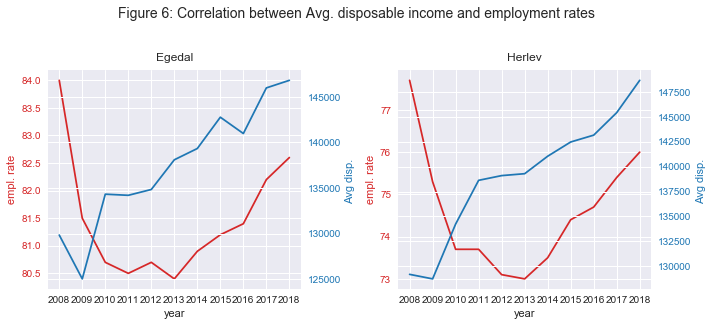

In [19]:
#Here we construct graphs to see the correlation between the average disposable income and the employment rate:

#Creating the figure:
fig = plt.figure(figsize=(10,4))
fig.suptitle('Figure 6: Correlation between Avg. disposable income and employment rates', size=14, y=1.12)

#Creating the left plot showing the correlation between the employment rate and the avarage disposable income in Egedal:
ax1_left = fig.add_subplot(1,2,1)
color = 'tab:red'
ax1_left.set_xlabel('year')
ax1_left.set_ylabel('empl. rate', color=color)
ax1_left.plot(Table2_Egedal['year'], Table2_Egedal['employment rate'], color=color)
ax1_left.tick_params(axis='y', labelcolor=color)
ax1_left.set_title('Egedal', pad=10)
ax1_left.grid(True)

#Creating a secondary y-axis in the left plot
ax2 = ax1_left.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Avg disp. ', color=color)  # we already handled the x-label with ax1
ax2.plot(Table2_Egedal['year'], Table2_Egedal['Avg disp income'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Creating the right plot showing the correlation between the employment rate and the avarage disposable income in Herlev:
ax1_right = fig.add_subplot(1,2,2)
color = 'tab:red'
ax1_right.set_xlabel('year')
ax1_right.set_ylabel('empl. rate', color=color)
ax1_right.plot(Table2_Herlev['year'], Table2_Herlev['employment rate'], color=color)
ax1_right.tick_params(axis='y', labelcolor=color)
ax1_right.set_title('Herlev', pad=10)
ax1_right.grid(True)

#Creating a secondary y-axis in the right plot
ax2 = ax1_right.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Avg disp. ', color=color)  # we already handled the x-label with ax1
ax2.plot(Table2_Herlev['year'], Table2_Herlev['Avg disp income'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
  


It is temption to conclude that there is a clear correlation between the avarage disposable income and the employmentrate when looking at figure 6. This does also make purely intuitive sence. When the average disposable income is increasing it is an indication of that it goes well for the economy. When it goes well for the economy firms hires more labor. 

A interesting observation is that even though Egedal has the higest employmentrate in every year the average disposable income in Herlev is higher. (HVORFOR????)

# Taking care of bias - nok ikke den bedste overskrift.

We have now been studying different municipalities based on how large there employment rates are. The choosen municipalities are not representative for Denmark, as it could be biased due to the size of the municipality. As to take care of this, we will now check the 10 largest municipalities based on the size of the population.

In [20]:
Table2_2010 =Table2[Table2.year=="2010"] #selecting a year index
Table2_2010_10largest = Table2_2010.nlargest(10,['population']) #Defining the table containing the the 10 largest municipalities
display(Table2_2010_10largest) #printing the 10 biggest municipalities in 2008 based on the population size.


,municipality,year,population,employment rate,Accident ratio,Immigrants ratio,Sentences ratio,Avg disp income
112,Copenhagen,2010,528208,69.7,0.00,9.90,85.25,129173
24,Aarhus,2010,306650,69.0,0.00,6.57,83.35,124444
13,Aalborg,2010,197426,69.7,0.00,3.66,83.57,128880
717,Odense,2010,188777,67.0,0.01,6.60,83.03,127482
145,Esbjerg,2010,115114,70.6,0.01,3.76,82.38,132434
1014,Vejle,2010,106383,74.8,0.00,4.09,80.83,134892
222,Frederiksberg,2010,96718,72.7,0.00,6.56,85.57,137355
739,Randers,2010,94750,71.3,0.00,3.05,81.95,130410
1036,Viborg,2010,93310,75.4,0.01,2.56,80.84,132666
541,Kolding,2010,89071,74.0,0.00,4.29,81.03,133237


In [21]:

print('The municipality with the lowest observed employment rate:')
display(Table2_2010_10largest.loc[Table2_2010_10largest['employment rate'] == np.min(Table2_2010_10largest['employment rate'])])

print('The municipality with the highest observed employment rate:')
display(Table2_2010_10largest.loc[Table2_2010_10largest['employment rate'] == np.max(Table2_2010_10largest['employment rate'])])

print('The municipalities with the median observed employment rate:') 
display(Table2_2010_10largest.loc[Table2_2010_10largest['employment rate'] == np.percentile(Table2_2010_10largest['employment rate'], 50, interpolation='nearest')])# Note that we were forved to make the interpolation statement. This statement is necessary because the median employment rate is between to municipalities as to why python cannot figure out wich one to choose. The statement states that it should pick the municipality closest to the "real median" 

print('The municipalities with the 25 percentile observed employment rate:')
display(Table2_2010_10largest.loc[Table2_2010_10largest['employment rate'] == np.percentile(Table2_2010_10largest['employment rate'], 25)])

print('The municipalities with the 75 percentile observed employment rate:')
display(Table2_2010_10largest.loc[Table2_2010_10largest['employment rate'] == np.percentile(Table2_2010_10largest['employment rate'], 75, interpolation='nearest')]) #Again we are needed to make the interpolation statement to "nearest"

The municipality with the lowest observed employment rate:


,municipality,year,population,employment rate,Accident ratio,Immigrants ratio,Sentences ratio,Avg disp income
717,Odense,2010,188777,67.0,0.01,6.6,83.03,127482


The municipality with the highest observed employment rate:


,municipality,year,population,employment rate,Accident ratio,Immigrants ratio,Sentences ratio,Avg disp income
1036,Viborg,2010,93310,75.4,0.01,2.56,80.84,132666


The municipalities with the median observed employment rate:


,municipality,year,population,employment rate,Accident ratio,Immigrants ratio,Sentences ratio,Avg disp income
145,Esbjerg,2010,115114,70.6,0.01,3.76,82.38,132434


The municipalities with the 25 percentile observed employment rate:


,municipality,year,population,employment rate,Accident ratio,Immigrants ratio,Sentences ratio,Avg disp income
112,Copenhagen,2010,528208,69.7,0.0,9.90,85.25,129173
13,Aalborg,2010,197426,69.7,0.0,3.66,83.57,128880


The municipalities with the 75 percentile observed employment rate:


,municipality,year,population,employment rate,Accident ratio,Immigrants ratio,Sentences ratio,Avg disp income
541,Kolding,2010,89071,74.0,0.0,4.29,81.03,133237


We see from the above tables, that there are more than one of the 10 municipality that have had an employmentrate at the 25 percentile in 2010. 

* Odense is chosen as the lowest employment rate.
* Viborg is chosen as the highest employment rate.
* Esbjerg is chosen as the median employment rate.
* To represent the 25 percentile we choose Copenhagen as it is the largest municipality in Denmark. 
* Esbjerg is chosen as the 75 percentile employment rate.

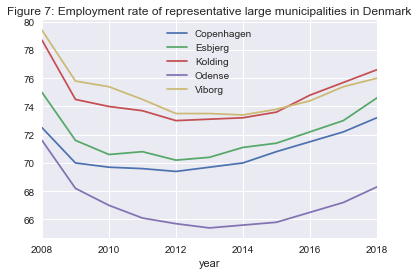

In [22]:
#Here we constructs different graphs to see the immediate relations and development of the variables

Employment_municipalities_large = Table2[Table2['municipality'].isin(['Odense', 'Viborg', 'Esbjerg', 'Copenhagen', 'Kolding'])] 

def plot5(fig):
    fig_employ_muni = fig.set_index('year')
    fig_employ_muni.groupby(['municipality'])['employment rate'].plot(legend=True, grid=True, title='Figure 7: Employment rate of representative large municipalities in Denmark');

plot5(Employment_municipalities_large)

As also seen in figure 1, we have that every municipality experienced a decline in the employmentrate from 2008 to 2012, for then to rise again. Opposite to figure 1, it seems like the 25 percentile (Odense) cannot follow the trend, which the other municipalities follows from 2012 and forward. 
A reason to why the employment rate of Copenhagen is relatively low, can be that there lives a lot of students in Copenhagen, whom in general do not work a lot. Students are in the working age and are therefore included in the statistic as not working.

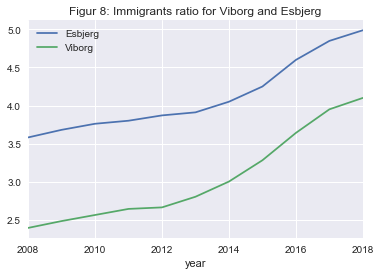

In [23]:
#Here we constructs a graph to see the immediate relations and development of the immigration ratio in Viborg and Esbjerg. The two municipalities is choosen as to show what the immigrants ratio is in the municipality with the highest observed employment rate together with the median observed employment rate.

Immigrants_Viborg_Esbjerg = Table2[Table2['municipality'].isin(['Viborg', 'Esbjerg'])] 

def plot6(fig):
    fig_employ = fig.set_index('year')
    fig_employ.groupby(['municipality'])['Immigrants ratio'].plot(legend=True, grid=True, title='Figur 8: Immigrants ratio for Viborg and Esbjerg');

plot6(Immigrants_Viborg_Esbjerg)    


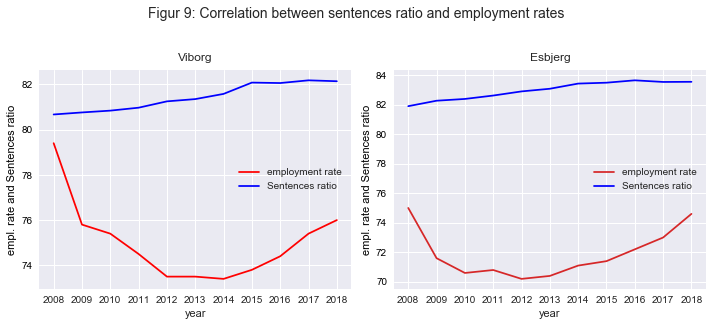

In [24]:
#Here we constructs a graph to see the immediate relations and development of the sentences ratio and employment rate for Viborg and Esbjerg
Table2_Viborg =Table2[Table2.municipality=="Viborg"] #selecting a table only consisting of Viborg
Table2_Esbjerg =Table2[Table2.municipality=="Esbjerg"] #selecting a table only consisting of Herlev

#Creating the figure:
fig = plt.figure(figsize=(10,4))
fig.suptitle('Figur 9: Correlation between sentences ratio and employment rates', size=14, y=1.12)

#Left plot showing the immidiate correlation between the employment rate and sentences ratio in Egedal
ax1_left = fig.add_subplot(1,2,1)
color = 'red'
ax1_left.set_xlabel('year')
ax1_left.set_ylabel('empl. rate and Sentences ratio', color='black')
ax1_left.plot(Table2_Viborg['year'], Table2_Viborg['employment rate'], color=color, label='employment rate')
ax1_left.plot(Table2_Viborg['year'], Table2_Viborg['Sentences ratio'], color='blue', label='Sentences ratio')
ax1_left.tick_params(axis='y', labelcolor='black')
ax1_left.legend(loc='middel right') 
ax1_left.set_title('Viborg', pad=10)
ax1_left.grid(True)

# Right plot showing the immidiate correlation between the employment rate and sentences ratio in Herlev
ax1_right = fig.add_subplot(1,2,2)
color = 'tab:red'
ax1_right.set_xlabel('year')
ax1_right.set_ylabel('empl. rate and Sentences ratio', color='black')
ax1_right.plot(Table2_Esbjerg['year'], Table2_Esbjerg['employment rate'], color=color, label='employment rate')
ax1_right.plot(Table2_Esbjerg['year'], Table2_Esbjerg['Sentences ratio'], color='blue', label='Sentences ratio')
ax1_right.legend(loc='middel right') 
ax1_right.tick_params(axis='y', labelcolor='black')
ax1_right.set_title('Esbjerg', pad=10)
ax1_right.grid(True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


The sentences ratio for both Viborg and Esbjerg has increased a little since 2008. Figure 9 do not indicate, that there is a relation between the sentences ratio and the employment rate. So based on figure 9 together with figure 4 and 5, we conclude that a possible correlation is not crystal clear. Later on we will analyze the correlation for every municipalities. But before that, we will plot the correlation between the avg. disposable income and the employment rate for Viborg and Esbjerg to see if the coherence discorved in figure 6 also assert itself for representative municipalities of the largest municipalities in Denmark.

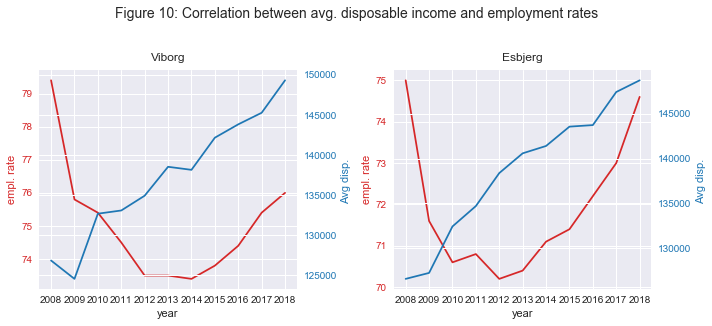

In [25]:
#Here we construct graphs to see the correlation between the average disposable income and the employment rate for Viborg and Esbjerg:

#Creating the figure:
fig = plt.figure(figsize=(10,4))
fig.suptitle('Figure 10: Correlation between avg. disposable income and employment rates', size=14, y=1.12)

#Creating the left plot showing the correlation between the employment rate and the avarage disposable income in Viborg:
ax1_left = fig.add_subplot(1,2,1)
color = 'tab:red'
ax1_left.set_xlabel('year')
ax1_left.set_ylabel('empl. rate', color=color)
ax1_left.plot(Table2_Viborg['year'], Table2_Viborg['employment rate'], color=color)
ax1_left.tick_params(axis='y', labelcolor=color)
ax1_left.set_title('Viborg', pad=10)
ax1_left.grid(True)

#Creating a secondary y-axis in the left plot
ax2 = ax1_left.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Avg disp. ', color=color)  # we already handled the x-label with ax1
ax2.plot(Table2_Viborg['year'], Table2_Viborg['Avg disp income'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Creating the right plot showing the correlation between the employment rate and the avarage disposable income in Esbjerg:
ax1_right = fig.add_subplot(1,2,2)
color = 'tab:red'
ax1_right.set_xlabel('year')
ax1_right.set_ylabel('empl. rate', color=color)
ax1_right.plot(Table2_Esbjerg['year'], Table2_Esbjerg['employment rate'], color=color)
ax1_right.tick_params(axis='y', labelcolor=color)
ax1_right.set_title('Esbjerg', pad=10)
ax1_right.grid(True)

#Creating a secondary y-axis in the right plot
ax2 = ax1_right.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Avg disp. ', color=color)  # we already handled the x-label with ax1
ax2.plot(Table2_Esbjerg['year'], Table2_Esbjerg['Avg disp income'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The correlation is not clear in for Viborg, but there seems to be a positively correlation for Esbjerg. In the next section we will check the correlation for every municipality in Denmark.

# Immidiately correlations

We will now plot every employment rate together with the different possible explanatory variables, to see if there is a immidiately correlation.

In [26]:
# Import figure from bokeh.plotting
import numpy as np
from bokeh.io import push_notebook, show, output_notebook, curdoc
from bokeh.layouts import row, widgetbox, column, gridplot
from bokeh.plotting import figure
from bokeh.models import Dropdown, Select, ColumnDataSource, HoverTool
output_notebook()

source = ColumnDataSource(Table2)
hover = HoverTool(tooltips=[('municipality', '@municipality')])

# Below is used to print text in bold
BOLD = '\033[1m'
END = '\033[0m'

# Create plot
print(BOLD + 'employment rate'+ END)
f1 = figure(x_axis_label ='Avg disp income', y_axis_label ='employment rate', plot_width=325, plot_height=275)
f1.circle('Avg disp income', 'employment rate', source=source)
f1.add_tools(hover)

f2 = figure(x_axis_label ='Immigrants ratio', y_axis_label ='employment rate', plot_width=325, plot_height=275)
f2.circle('Immigrants ratio', 'employment rate', source=source)
f2.add_tools(hover)

f3 = figure(x_axis_label ='Sentences ratio', y_axis_label ='employment rate', plot_width=325, plot_height=275)
f3.circle('Sentences ratio', 'employment rate', source=source)
f3.add_tools(hover)

f4 = figure(x_axis_label ='Accident ratio', y_axis_label ='employment rate', plot_width=325, plot_height=275)
f4.circle('Accident ratio', 'employment rate', source=source)
f4.add_tools(hover)

# Display the plot
show(gridplot([[f1,f2],[f3,f4]]))


Loading BokehJS ...

employment rate


The plots above show a positive correlation between the avg. disposable income and employment rate independent of the municipalities. Furthermore we can see, that there is a negativ correlation between the sentences ratio and the employment rate. It is harder to see a correlation between the accident ratio and the employment rate together with the immigrations ratio and the employment rate. A weak conclusion could be that there is ... correlation between the immigration ratio and the employment rate.

Finally we make the excact same plot, but this time only for the 10 largest municipalities in Denmark.

In [27]:
source = ColumnDataSource(Table2_2010_10largest)
hover = HoverTool(tooltips=[('municipality', '@municipality')])

# Below is used to print text in bold
BOLD = '\033[1m'
END = '\033[0m'

# Create plot
print(BOLD + 'employment rate'+ END)
f1 = figure(x_axis_label ='Avg disp income', y_axis_label ='employment rate', plot_width=325, plot_height=275)
f1.circle('Avg disp income', 'employment rate', source=source)
f1.add_tools(hover)

f2 = figure(x_axis_label ='Immigrants ratio', y_axis_label ='employment rate', plot_width=325, plot_height=275)
f2.circle('Immigrants ratio', 'employment rate', source=source)
f2.add_tools(hover)

f3 = figure(x_axis_label ='Sentences ratio', y_axis_label ='employment rate', plot_width=325, plot_height=275)
f3.circle('Sentences ratio', 'employment rate', source=source)
f3.add_tools(hover)

f4 = figure(x_axis_label ='Accident ratio', y_axis_label ='employment rate', plot_width=325, plot_height=275)
f4.circle('Accident ratio', 'employment rate', source=source)
f4.add_tools(hover)

# Display the plot
show(gridplot([[f1,f2],[f3,f4]]))

employment rate


As there is not many observations in the plots above it is difficult to see correlations. But the plots could indicate, that there is a positive correlation between the avg. disposable income and employment rate. Furthermore we can see, though it is not crystal clear, that there is a negativ correlation between the sentences ratio and the employment rate. Even harder to see is that the correlation between the immigrants ratio and employment rate - though it seems like a negativ correlation. Summing up, both the plots for every municipality together with the subgroup of the 10 largest municipalities indicates the same results. Which lead to the final conclusion.

4. **Conclusion**

Skal generelt laves om. 
In the start of this assignment we downloaded, cleaned and merged different datasets. The intension and goal of this assignment was to establish a foundation of an analyze of the employment rate in the different danish municipalities. We therefore have cleaned several datasets for then to merge them into one big table containing the quired variables, which should make the foundation of the analysis. After marging the datasets we turned to show the imidiate correlations between the different variables. The different municipalities choosen to this part of the assignment was chosen based on a boxplot, which should make a representative selction of municipalities. The boxplot yield the highest observed employmentrate, the lowest observed employment rate together with the median, 25 percentile and 75 perentile. 

As to take into account that presented immidately correlations was not only due to biasness, when then turned to analyze the 10 largest municipalities. Wherefrom we again toke a representative sample containing the the highest observed employmentrate, the lowest observed employment rate together with the median, 25 percentile and 75 perentile.


Nedenfor skal skriver om
(Figur 1: Shows how the employment rate have moved in the five cities choosen for the period 2008-2018.

Figur 2: Shows the immigration ratio for Skanderborg and Aabenraa for the period 2008-2018. Aabenraa has had a small but steady increase while the ratio in Skanderborg has lowered 

Figur 3 & 4: Shows the correlation between between sentences and employment rate. There seems to be a small correlation between these variables where sentences is affected a year or two later. However this is a correlation and not a casuality observation. )

The Plots: 
The plots above show a positive correlation between the avg. disposable income and employment rate independent of the municipalities. Furthermore we can see, that there is a negativ correlation between the sentences ratio and the employment rate. It is harder to see a correlation between the accident ratio and the employment rate together with the immigrations ratio and the employment rate. A weak conclusion could be that there is ... correlation between the immigration ratio and the employment rate.